# Доверительные интервалы на основе bootstrap для среднего числа звонков в колл-центр

In [1]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
telecom_data = pd.read_csv('../../data/telecom_churn.csv')

In [3]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


**Посмотрим на число звонков в колл-центр (Customer service calls ) среди лояльных и ушедших (Churn)**

In [4]:
telecom_data[['Customer service calls', 'Churn']].head()

,Customer service calls,Churn
0,1,False
1,1,False
2,0,False
3,2,False
4,3,False


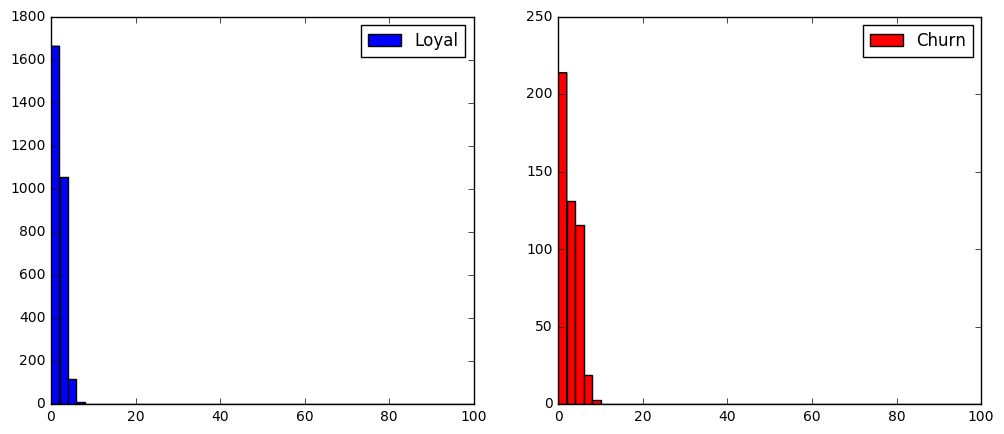

In [5]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(telecom_data[telecom_data['Churn'] == False]['Customer service calls'], 
           bins = 50, color = 'b', range = (0, 100), label = 'Loyal')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(telecom_data[telecom_data['Churn'] == True]['Customer service calls'],
           bins = 50, color = 'r', range = (0, 100), label = 'Churn')
pylab.legend()

pylab.show()

## Bootstrap

In [6]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [7]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

### Интервальная оценка среднего числа звонков в колл-центр

In [8]:
loyal_calls = telecom_data[telecom_data['Churn'] == False]['Customer service calls'].values
churn_calls= telecom_data[telecom_data['Churn'] == True]['Customer service calls'].values

In [9]:
np.random.seed(0)

loyal_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(loyal_calls, 1000)]
churn_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(churn_calls, 1000)]

print("Service calls from loayl:  median interval",  stat_intervals(loyal_mean_scores, 0.05))
print("Service calls from churn:  median interval",  stat_intervals(churn_mean_scores, 0.05))

Service calls from loayl:  median interval [ 1.4077193   1.49473684]
Service calls from churn:  median interval [ 2.0621118   2.39761905]


### Точечная оценка разности средних

In [10]:
print("delta median", np.mean(churn_calls) - np.mean(loyal_calls))

delta median 0.779989103193


### Интервальная оценка разности медиан

In [11]:
mean_scores = zip(loyal_mean_scores, churn_mean_scores)

In [12]:
delta_mean_scores = [x[1] - x[0] for x in mean_scores]

In [13]:
print("delta median interval",  stat_intervals(delta_mean_scores, 0.05))

delta median interval [ 0.60603699  0.95328277]
